# Applied Statistics - E-news Express

### Problem Statement

The design team of the company has researched and created a new landing page that has a new outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

- Do the users spend more time on the new landing page than on the existing landing page?
- Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Does the converted status depend on the preferred language?
- Is the time spent on the new page the same for the different language use

### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

- user_id - Unique user ID of the person visiting the website
- group - Whether the user belongs to the first group (control) or the second group (treatment)
- landing_page - Whether the landing page is new or old
- time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
- converted - Whether the user gets converted to a subscriber of the news portal or not
- language_preferred - language chosen by the user to view the landing page

#### Let Us Start By Importing some Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

%matplotlib inline

#### Understanding the Structure of the data

In [3]:
data = pd.read_csv("datasets/abtest.csv")

In [4]:
data.shape

(100, 6)

In [5]:
#different datatypes in a column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations

- int64 is datatype of column 'user_id' column
- object is datatype of column 'group','landing_page','converted','language_preferred'
- float64 is datatype of column 'time_spent_on_the_page'

In [6]:
#statistical summary of the dataset
data.describe(include="all")

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


### Observations

- The mean time_spent_on_the_page is 5.377sec wherein the standard deviation is 2.378sec.
- The language_preferred is Spanish with 34 count
- Most of the people are converted with a count of 54



In [7]:
#missing values in the data
data.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Observations

- There are no null values in the dataset

In [8]:
#hecking for any duplicates in the dataset
duplicates = data.duplicated()
print(duplicates.value_counts())

False    100
dtype: int64


### Observations

- There are no duplicates in the dataset

### Exploratory Data Analysis (EDA)

### Univariate Analysis

<AxesSubplot: xlabel='user_id', ylabel='count'>

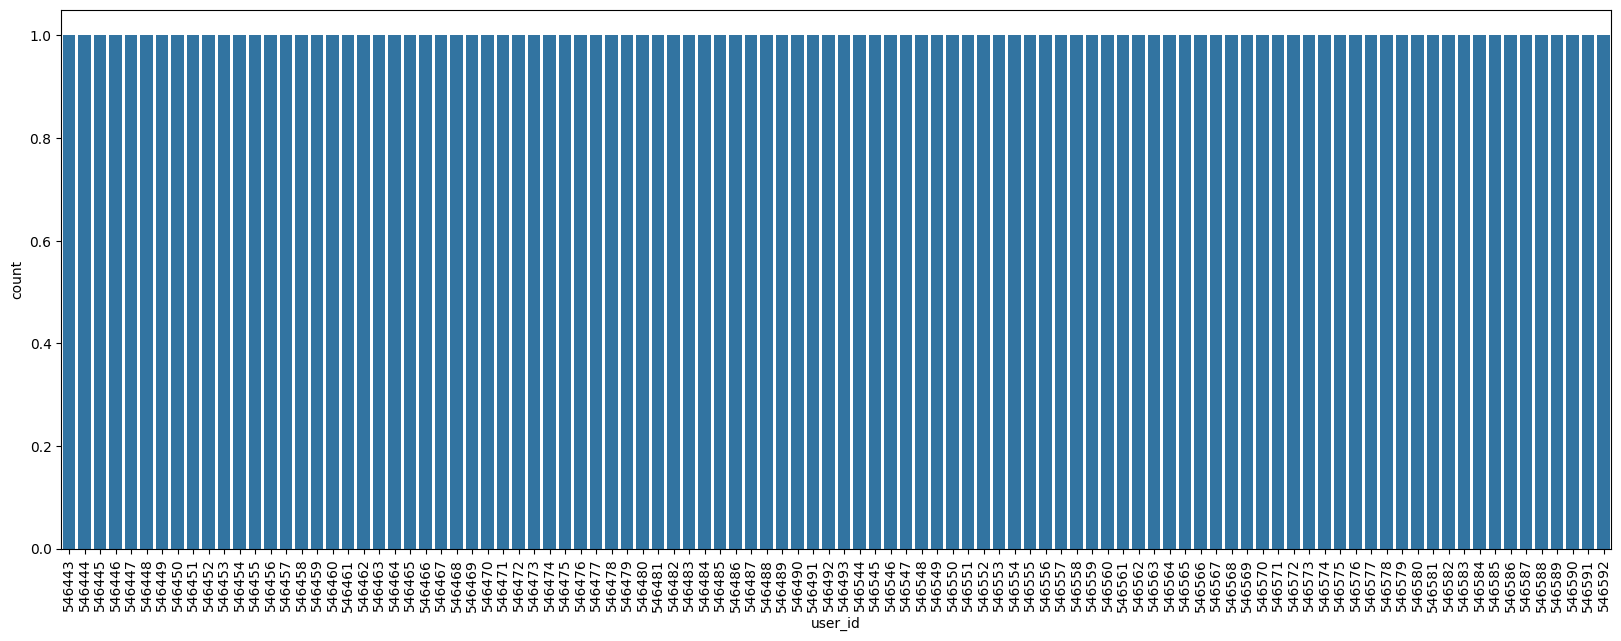

In [9]:
#countplot of user_id of the data
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot(data=data,x='user_id')

### Observations

- There are no duplicate users in the data, therefore the data is clean from the user_id perspective.

<AxesSubplot: xlabel='group', ylabel='count'>

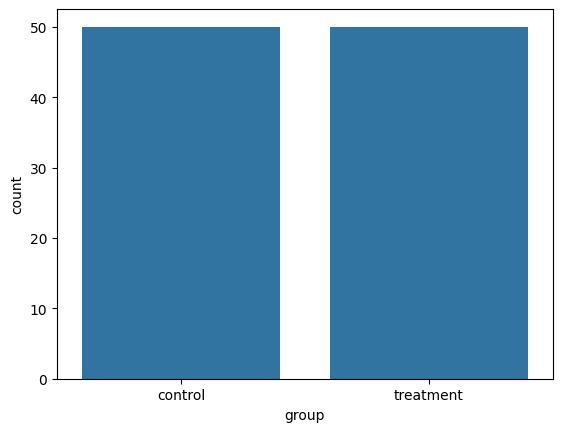

In [10]:
#countplot of the group of the data
sns.countplot(data=data,x='group')

### Observations

- Both the groups 'control' and 'treatment' have the same frequency of 50, that is same of number of people from both the groups.

Therefore since the both the groups have equal count, sampling would not be required before further model building.

<AxesSubplot: xlabel='landing_page', ylabel='count'>

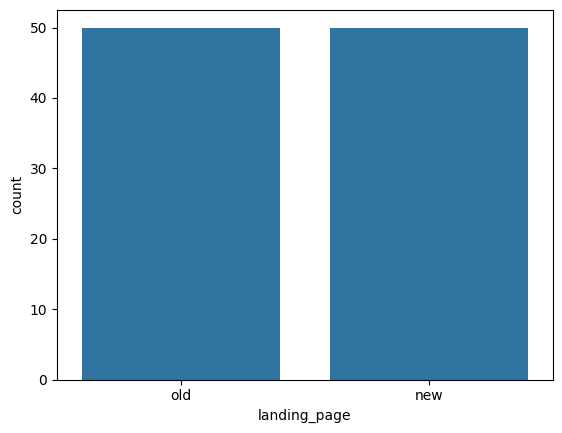

In [11]:
# countplot of the landing_page of the data
sns.countplot(data=data,x='landing_page')

### Observations

- There are equal number of 'old' and 'new' landing pages that is of frequency 50 each.

Therefore since the landing pages have equal count, sampling would not be required before further model building.

<AxesSubplot: xlabel='time_spent_on_the_page', ylabel='Count'>

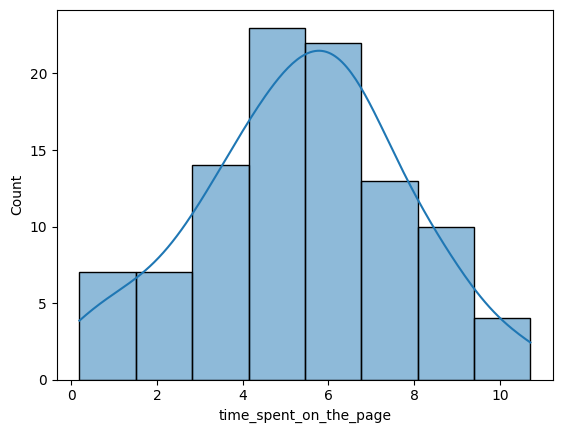

In [12]:
sns.histplot(data=data,x='time_spent_on_the_page',kde=True)

### Observations

- Most of the people spend close to 4-6 seconds on the landing page
- Least number of people spend more than 10 seconds on the landing page

In [13]:
#boxplot for time_spent_on_the_page
px.box(data,x='time_spent_on_the_page')

### Observations

- The column 'time_spent_on_landing_page' is evenly distributed and the data does not seem skewed in any direction and does not have outliers either.
- Since the data is evenly distributed statiscally, there is no work on this column individually.

<AxesSubplot: xlabel='converted', ylabel='count'>

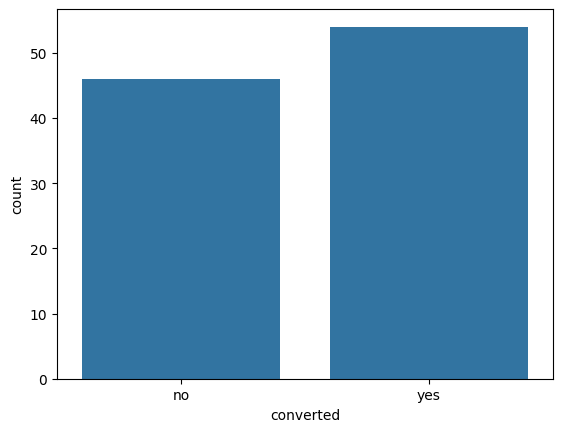

In [14]:
#countplot for the converted
sns.countplot(data=data,x='converted')

### Observations

- There are slightly  more number of people that are converted to go further into the pages which is a good sign and we should focus towards catering these people.
- There are substantially large number of people who do not wish to go further which needs to be further studied

<AxesSubplot: xlabel='language_preferred', ylabel='count'>

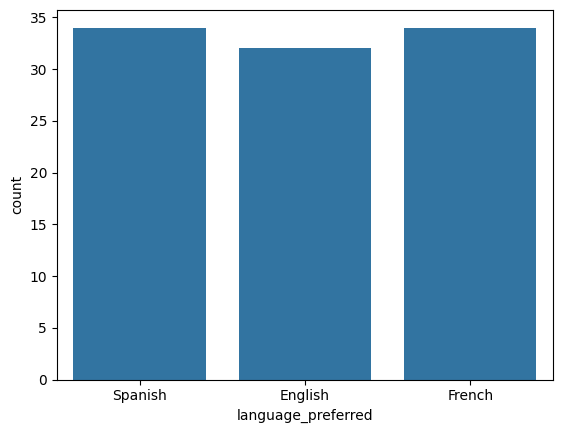

In [15]:
#countplot of language_preferred 
sns.countplot(data=data,x='language_preferred')

### Observations

- There are pretty much equal preference for each of the language ('English','French','Spanish') with English slightly lower and rest of the two equal.
- Now, we know that our potential customers/clients could be who have preferred language of 'Spanish' and 'French'.

### Bivariate and Multivarite Analysis (EDA)

In [16]:
#violin plot to check distribution of users with respect to groups
px.violin(data,x='group',y='user_id')

### Observations

- The users of user_id less than 546500 is most likely to be of group 'treatment'
- The users of user_id more than 546500 is most likely to be of group 'control'

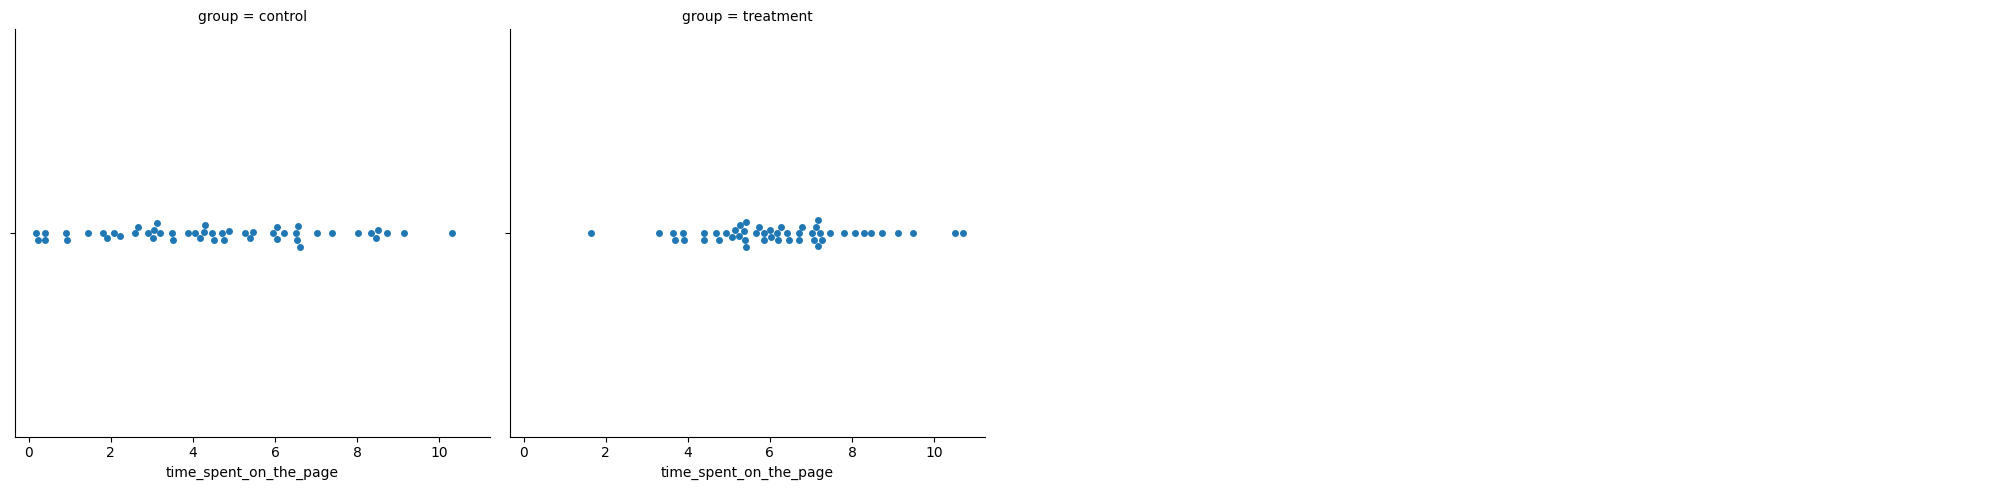

In [53]:
#comparsion between group and time_spent_on_the_page
sns.catplot(
    data= data,
    col= 'group',
    x='time_spent_on_the_page',
    kind = 'swarm',
    col_wrap=4
)

### Observations

- The 'control' group have varied customers of spending time on the website. Need to look at certain who are spending less time on the website.
- The 'treatment' group have customers who tend to spend more time on the website, could be our potential customers

<AxesSubplot: xlabel='landing_page', ylabel='time_spent_on_the_page'>

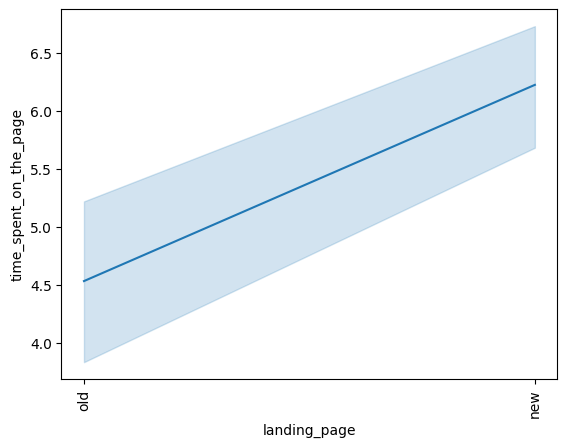

In [17]:
#lineplot to relation between time_spent_on_landing page and landing_page
plt.xticks (rotation = 90)
sns.lineplot(data,y='time_spent_on_the_page',x='landing_page')

### Observations

- Newer landing page has more time spent on the landing page 
- Older landing page has less time spent on the landing page

Therefore, people with older landing page if wants to increase the time spent should change to newer landing page

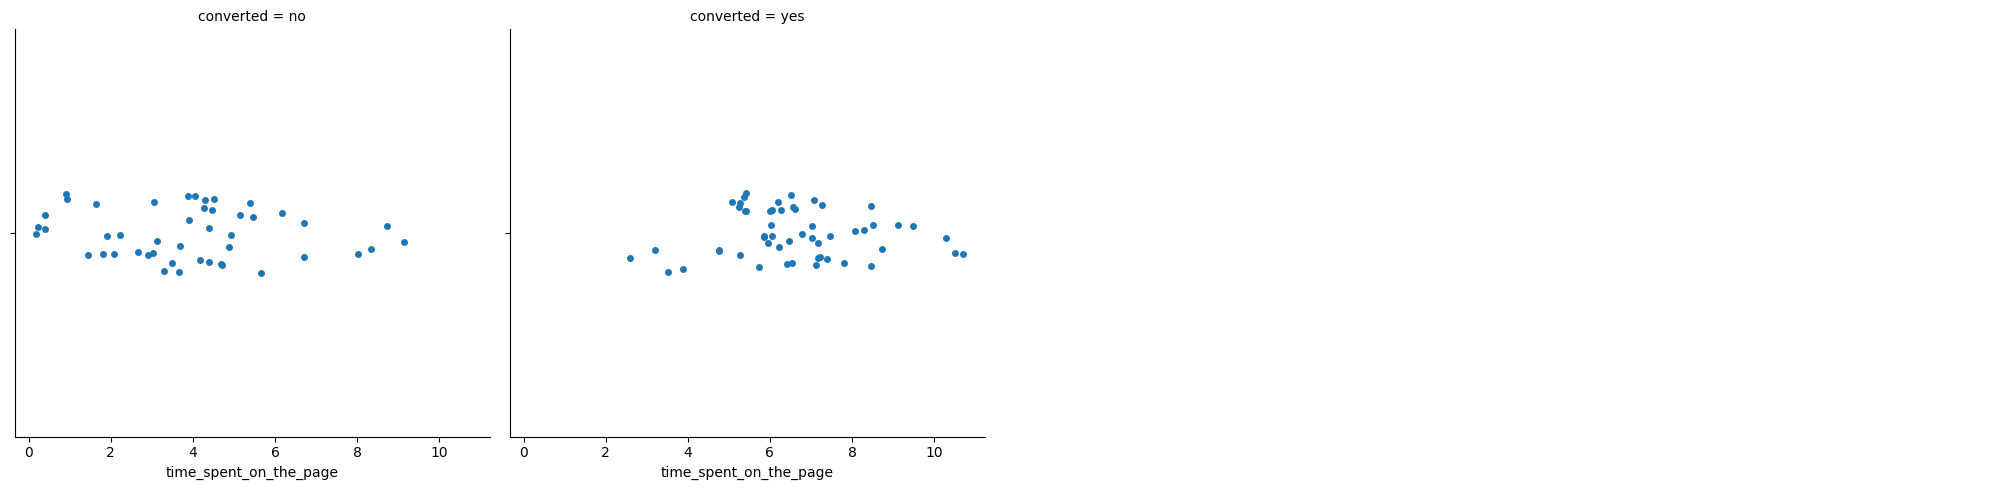

In [18]:
#catplot to check density of converted people based on the time spent on the landing page
sns.catplot(
    data= data,
    col= 'converted',
    x='time_spent_on_the_page',
    kind = 'strip',
    col_wrap=4
)

### Observations

- People are not converting have tend  comparatively less time on the landing page of the website
- People who are converting have tend to spend comparatively more time on the landing page of the website

There are certain cases wherein, people have spent good amount of time on the  landing page but have not been converted, which requires further more investigation.


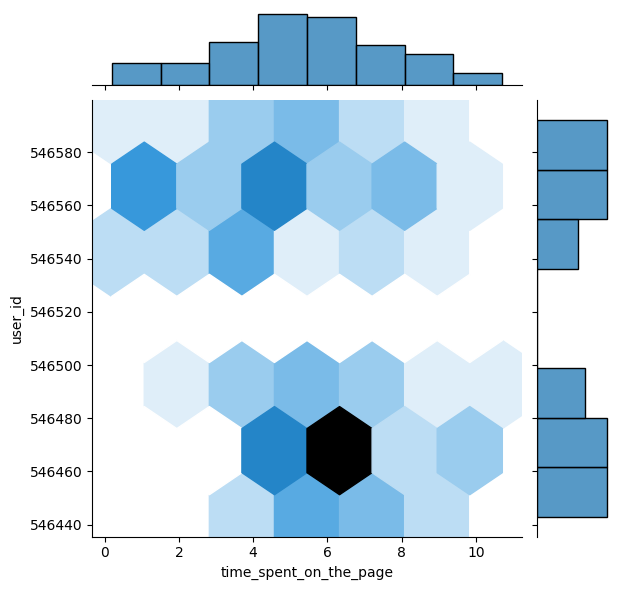

In [19]:
#jointplot to check what users spend how much time on the landing page
sns.jointplot(data,x='time_spent_on_the_page',y='user_id',kind='hex')

### Observations

- User-id from 546440 to 546500 tend to spend more time on the landing page and are potentially our customers
- User-id from 546540 to 546580 tend to spend less time on the landing page, needs further investigation in terms of their requirement.

<AxesSubplot: xlabel='language_preferred', ylabel='count'>

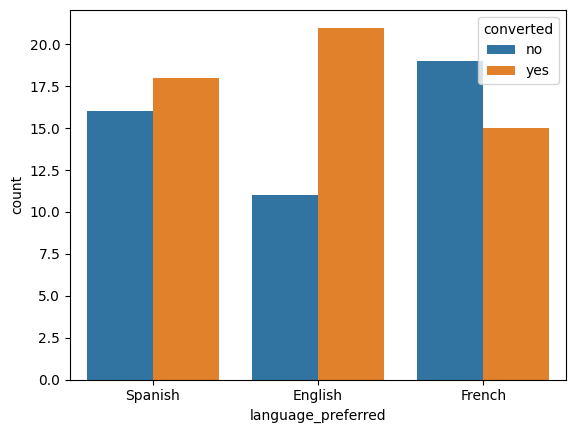

In [20]:
# heatmap to check the correlation between data
sns.countplot(data,x='language_preferred',hue='converted')

### Observations

- English has most conversion rate, wherein people whose preferred language is English tend to convert more and there are certain which are not converted calling for further investigation
- French is the preferred language which has more non-converted people as compared to converted people, this would call for immediate action as people choosing preferred language French are being lost.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8628\20888280.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




<AxesSubplot: xlabel='language_preferred', ylabel='user_id'>

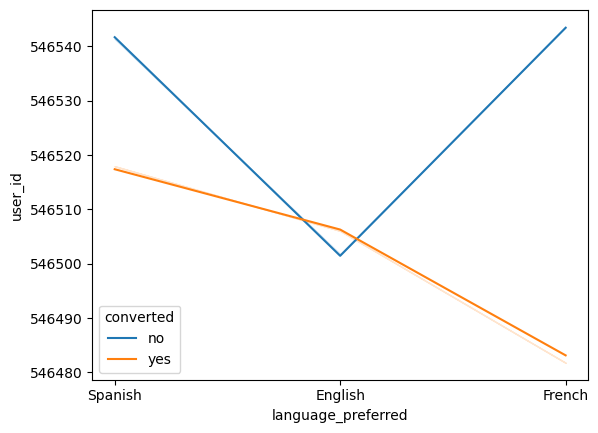

In [21]:
#comparing between language_preferred vs user_id vs converted
sns.lineplot(data=data,y='user_id', x='language_preferred',ci=False,hue='converted')

### Observations

- User id between 546520 and 546540 tend not converted with Spanish preferred_lanugage
- User id between 546480 and 546520 tend to be converted with Spanish preferred_language
- User id between 546510 and 546480 tend to be converted with English preferred language
- User id between 546510 and 546540 tend not to be converted with English preferred language
- There are very less number of people who have been converted with French as a preferred lanugage

This data would help in catering the people as per their preferred_language

### *Question* - Do the users spend more time on the new landing page than on the existing landing page?

<AxesSubplot: xlabel='time_spent_on_the_page', ylabel='landing_page'>

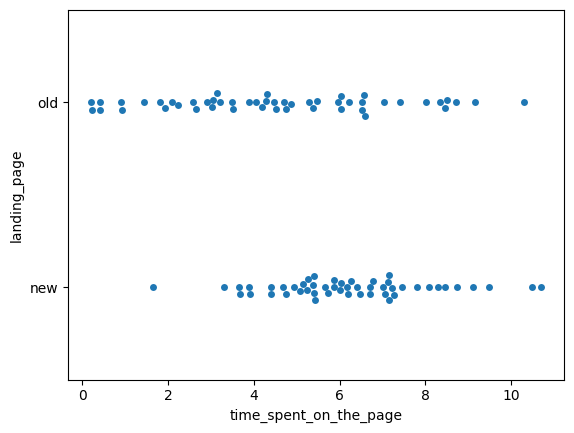

In [22]:
# swarmplot to check time spent on the landing page based on which page it is
sns.swarmplot(data=data,x='time_spent_on_the_page', y= 'landing_page')

### Observations

- Users accessing the new landing page tend to spend more time on the page.
- Users accessing the old landing page tend to spend less time on the page. However, there are certain instances when old landing page is also accessed by users for longer time. 

Therefore to get a more estimation, we need to move towards tests used for statistical analysis

##### *Null Hypothesis* - The mean time spent by users on the new landing page is equal to mean time spent by users on the old landing page
##### *Alternate Hypothesis* - The mean time spent by users on the new landing page is more than the mean time spent by users on the old landing page


##### *Statistical Test* - One tailed T-test, since in this scenerio, we are comparing the means of two groups when we do not have any information about the variance.

In [23]:
from scipy.stats import ttest_ind,shapiro,levene

#filtering the data based on the landing page
new_page_data = data[data['landing_page' ] == 'new']['time_spent_on_the_page']
old_page_data = data[data['landing_page'] == 'old']['time_spent_on_the_page']


# Check for Normality
new_normality = shapiro(new_page_data)
old_normality = shapiro(old_page_data)
print(f"Shapiro-Wilk Test for New Page: p-value = {new_normality.pvalue}")
print(f"Shapiro-Wilk Test for Old Page: p-value = {old_normality.pvalue}")

# Check for Equal Variances
levene_test = levene(new_page_data, old_page_data)
print(f"Levene’s Test for Equal Variances: p-value = {levene_test.pvalue}")

Shapiro-Wilk Test for New Page: p-value = 0.8040016293525696
Shapiro-Wilk Test for Old Page: p-value = 0.45611920952796936
Levene’s Test for Equal Variances: p-value = 0.008950671168914428


### Observations 

We now know that the both the time spent on new and old landing page have passed the criteria for normality using the Shapiro test and have failed for the test for having equal variances using the Levene's test.

In [24]:
# performing the ttest for 2 independent samples

test_stat, p_value = ttest_ind(new_page_data,old_page_data,alternative='greater')
print (p_value)

0.0001316123528095005


### Observations 

- Since the norm of considering the sigificance level is 0.05 and the p-value in our case is 0.00013 which is less than 0.05, there is sufficient evidence to "Reject the Null Hypothesis", saying that there is more time spent by users on the new landing page rather than the old landing page

### *Question* - Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

<AxesSubplot: xlabel='landing_page', ylabel='count'>

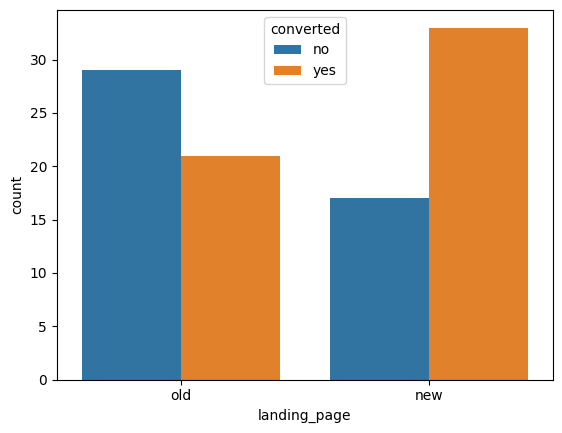

In [25]:
#comparison between conversion rate on new landing page vs on the old landing page
sns.countplot(data=data,x='landing_page',hue='converted')

### Observations

- As we can see that new landing pages have more conversion rate as compared to non-conversion on the new landing pages front.
- On the old landing pages, there are conversion of people is comparatively less

However, the proportion is different to be justified with just one graph

##### *Null Hypothesis* - new landing page have equal or less conversion rate than old landing page 

##### *Alternate Hypothesis* - new landing page have more conversion rate than the old landing page

##### *Statistical Test* - One tailed two proportion z-test since the samples are discrete,independent in nature with an aim to find the proportion of conversion rate based on the landing page

In [34]:
from statsmodels.stats.proportion import proportions_ztest

#count of conversion rate on the new page and old page
conversion_count = [data[data['landing_page'] == 'new'][data['converted'] == 'yes'].shape[0], data[data['landing_page'] == 'old'][data['converted']== 'yes'].shape[0]]


#total sample size of new page and old page visitors
nobs = [data[data['landing_page'] == 'new'].shape[0], data[data['landing_page'] == 'old'].shape[0]]


#performing the test 
test_stat,p_value = proportions_ztest(conversion_count,nobs,alternative='larger')
print (p_value)


0.008026308204056278


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8628\2979317499.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



### Observations 

- Since the norm of considering the significance value is 0.05 and the p_value is 0.0080 which is significantly less than the significance value, we can "Reject the Null Hypothesis" and say that they is more conversion rate for users on the new landing page as compared to the old landing page.

### *Question* - Does the converted status depend on the preferred language?

<AxesSubplot: xlabel='language_preferred', ylabel='Count'>

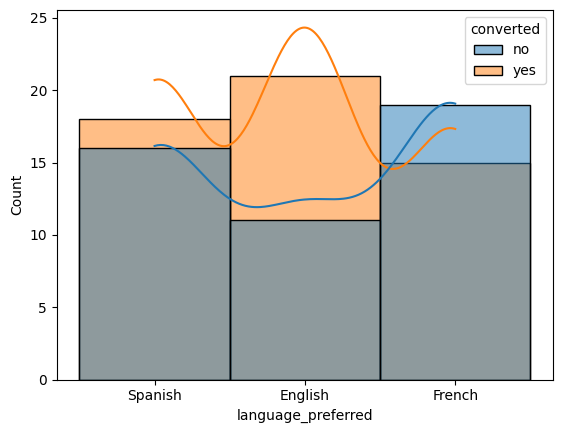

In [39]:
# stacked histplot to compare the language preferred and convertion status
sns.histplot(data=data, x='language_preferred', hue='converted', kde=True)

### Observations

- The number of people who have preferred English and are converted are the most. 
- The number of people who have preferred French and are converted are the least. 

However, we are unable to find whether the conversion rate is dependent on the language preferred, therefore we should consider using the statistical methods

##### *Null Hypothesis* - The conversion rate does not depend on the preferred language

##### *Alternate Hypothesis* - The conversion rate does depend on the preferred language

##### *Test Statistic* - Chi-squared test since the variables are categorical to test the level of independence

In [51]:
from scipy.stats import chi2_contingency

#creation of contingency table
contingency_table = pd.crosstab(data["language_preferred"], data["converted"])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(p_value)

0.2129888748754345


### Observations

- Since the norm of considering the significance value is 0.05 and the p_value is 0.2129 which is singnificantly higher as compared to the significance value, therefore we "Cannot Reject the Null Hypothesis" which states that the language preferred is not dependent on the conversion status

### *Question* - Is the mean time spent on the new page same for the different language users?

<AxesSubplot: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

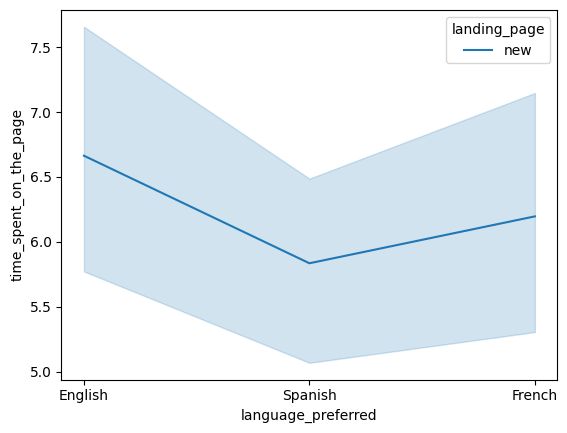

In [48]:
#lineplot to compare the different language users on new page
new_data = data[data['landing_page'] == 'new']
sns.lineplot(data=new_data,x = 'language_preferred' , y = 'time_spent_on_the_page' ,hue='landing_page')

### Observations

- The time spent based on the language preferred on the new landing page varies for all the new different languages with preferred language English having the most time spent on the new landing page and Spanish having the least.

But it is not clearly evident, how the varies with preferred language users for the new landing page

##### *Null Hypothesis* - The mean time on the new landing page is same for all language users

##### *Alternate Hypothesis* - The mean time spent on the new page is not the same for at least one pair of language users

##### *Test Statistic* - One way Anova test, since we are comparing the mean time spent for different language users and the mean time is a continuous variable. One of the datatype is continuous while the other is discrete further strengthens the point of  choosing this test statistic

In [49]:
from scipy.stats import f_oneway

test_stat,p_value = f_oneway(new_data.loc[new_data['language_preferred'] == 'English','time_spent_on_the_page'],
                                                new_data.loc[new_data['language_preferred'] == 'French', 'time_spent_on_the_page'],
                                                new_data.loc[new_data['language_preferred'] == 'Spanish','time_spent_on_the_page'])

print (p_value)

0.43204138694325955


### Observations

-  Since the norm of considering the significance value is 0.05 and the p_value is 0.4320, which is significantly greater than the significance value, we "Cannot Reject the Null Hypothesis" which states the mean time spent is same for all language users.

### Conlusions 

1. There are more people favouring the new landing page over the old landing page
2. The time spent on the new landing page is relatively more than that of the old landing page statistically.
3. Statistically, preferred language has no impact on the conversion rate.
4. Graphically, time spent on the landing page has effect on the conversion rate, wherein more time spent equates to more conversion rate.
5. Graphically, group under the name treatment and certain people of group under the name of control spend significant amount of time on the website. 



### Business Recommendations

1. There are a lot of customers whose preferred language is 'French' yet spend very less time on the landing page therefore, the landing page needs improvement when language is French.
2. The customers who are converted are the potential customers and should be getting more of a personalized experience with respect to further requirements.
3. The customers who spend good amount of time yet are not converted, are most likely unable to find what they require hence, should have a talk with our team for further clarifications on the requirements.
4. The team under the name of control who are not spending good amount of time on the website should be spoken in terms of their requirements. 